In [1]:
%%HTML
<style>
p {
    color: #343a40;
}

h1 a.anchor-link {
    color: #F7ECCB;
}

h1 {
    background-color: #343a40;
    width: fit-content;
    padding: 15px;
    color: white;
    text-align: center;
    width: 100%;
}

.intro {
    width: 60%;
    margin: auto;
    text-align: justify !important;
    font-family: Georgia;
}

.output_png {
    display: flex;
    align-items: center;
    justify-content: center;
}

.hide_btn {
    background-color: #343a40;
    padding: 15px;
    color: white;
    border-radius: 30px;
    border: none;
}
</style>

In [2]:
%%HTML
<script>
    code_show=true;
    function code_toggle() {
         if (code_show){
             $('div.input').hide();
         } else {
             $('div.input').show();
         }
         code_show = !code_show
    }
    $( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()">
    <input class='hide_btn' type="submit"
    value="Toggle code">
</form>

In [3]:
import os
os.environ['SKIMAGE_DATADIR'] = '/tmp/.skimage_cache'

In [4]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [12]:
from skimage.io import imread, imshow
from skimage.transform import downscale_local_mean
from skimage.color import rgb2gray, rgb2hsv, gray2rgb
from skimage import img_as_ubyte, img_as_float
from skimage.exposure import histogram, cumulative_distribution
from skimage.morphology import closing, opening, area_closing, area_opening, erosion, dilation
from skimage.measure import label, regionprops

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
from scipy.stats import norm
from scipy.signal import convolve2d

# Chapter 5: You in the Red Shirt (Part 1)

<p class='intro'><br>Dear diary,<br>
I didn't expect to, but I saw him again. I was planning on following him home some other day, but when I saw him in the streets, I dropped my plans. He seemed dressed up. I wondered where he was going. It turned out to be a party. And. . . there were a lot of girls. Too many girls. And he smiled too much at them. I nearly lost him in the crowd, but my heart was drawn to him. And I never let him out of my sight again.
</p>
<p class='intro'><i>I will find him wherever he is.</i></p>

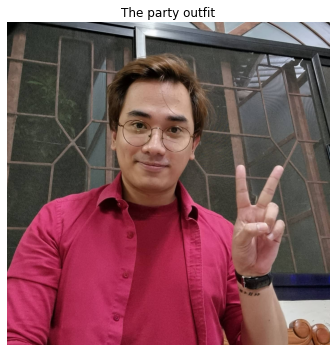

In [7]:
ch5 = imread('images/ch5-6.jpg')
plt.figure(figsize=(20, 5))
plt.axis('off')
plt.title('The party outfit')
plt.tight_layout()
plt.imshow(ch5);

I had to make sure I would be able to find you in any crowd. Good thing your top is so unique. I can use image segmentation to pick you out.

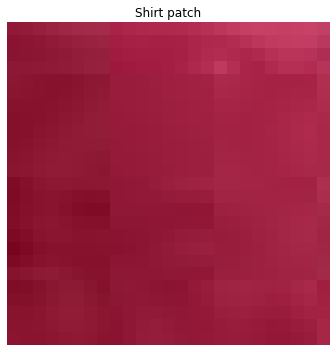

In [8]:
shirt_R = ch5[:, :, 0]
shirt_G = ch5[:, :, 1]
shirt_B = ch5[:, :, 2]

shirt_patch = ch5[1100:1125,200:225]
plt.figure(figsize=(20, 5))
plt.axis('off')
plt.title('Shirt patch')
plt.tight_layout()
plt.imshow(shirt_patch);

I can use this patch of shirt to get the threshold values I want for my mask. All I need are the statistics per channel. What are the reds, greens, and blues of this shirt? Clearly, all we're seeing is red, but remember, an image is often made up of more than one color.

In [9]:
patch_r = shirt_patch[:,:,0]
patch_g = shirt_patch[:,:,1]
patch_b = shirt_patch[:,:,2]

print("Red patch:", patch_r.min(), patch_r.mean(), patch_r.max())
print("Green patch:", patch_g.min(), patch_g.mean(), patch_g.max())
print("Blue patch:", patch_b.min(), patch_b.mean(), patch_b.max())

Red patch: 121 152.6368 200
Green patch: 4 29.3712 66
Blue patch: 31 60.352 103


Using the min and max values of each channel found in the patch, I created the filters, and added all of them together. I was able to successfully get the mask for the shirt, although some of the creases disappeared.

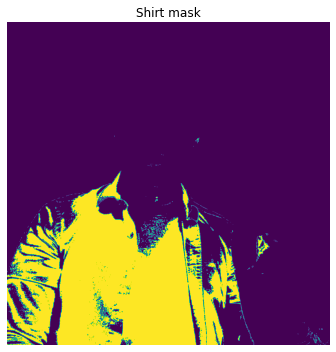

In [10]:
r_mask = (shirt_R <= 200) & (shirt_R >=121)
g_mask = (shirt_G <= 66) & (shirt_G >= 4)
b_mask = (shirt_B <= 103) & (shirt_B >= 31)

rgb_mask = r_mask * g_mask * b_mask
plt.figure(figsize=(20, 5))
plt.axis('off')
plt.title('Shirt mask')
plt.tight_layout()
plt.imshow(rgb_mask);

Once I had the shirt mask, I was able to get the shirt. Now, while he's wearing this shirt, I can find him anywhere.

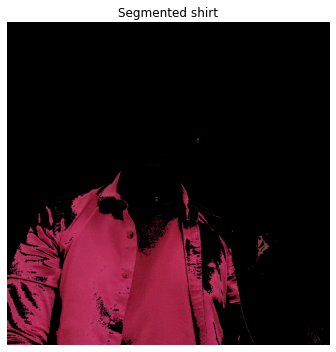

In [11]:
def apply_mask(image, filt):
    ch1 = image[:,:,0]*filt
    ch2 = image[:,:,1]*filt
    ch3 = image[:,:,2]*filt
    image_masked = np.dstack((ch1, ch2, ch3))
    return image_masked


plt.figure(figsize=(20, 5))
plt.axis('off')
plt.title('Segmented shirt')
plt.tight_layout()
plt.imshow(apply_mask(ch5, rgb_mask));

<p class='intro'>Red really is his color. But I wonder do wonder. . . Maybe I can do better. </p>
<p class='intro'><i>I'll try this again. xoxo</i></p>